In [77]:
#Q7
import pandas as pd
data = pd.read_csv('Titanic/train.csv')
q7 = data.count(0).to_frame().transpose().rename(index={0:'count'})

q7 = q7.append(data.mean().to_frame().transpose()).rename(index={0:'mean'})
q7 = q7.append(data.std().to_frame().transpose()).rename(index={0:'std'})
q7 = q7.append(data.min().to_frame().transpose()).rename(index={0:'min'})
q7 = q7.append(data.quantile(0.25).to_frame().transpose()).rename(index={0.25:'25%'})
q7 = q7.append(data.quantile(0.5).to_frame().transpose()).rename(index={0.5:'50%'})
q7 = q7.append(data.quantile(0.75).to_frame().transpose()).rename(index={0.75:'75%'})
q7 = q7.append(data.max().to_frame().transpose()).rename(index={0:'max'})

for x in ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']:
    q7[x] = q7[x].astype(float)

for x in ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']:
    q7 = q7.drop(x, 1) 
q7

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [149]:
#Q8
import pandas as pd
data = pd.read_csv('Titanic/train.csv')

q8 = data.count(0).to_frame().transpose()
q8 = q8.append(data.nunique().to_frame().transpose())
q8 = q8.append(data.mode().iloc[0])
q8 = q8.append({'PassengerId': 0,'Survived': data['Survived'].value_counts().max(), 'Pclass': data['Pclass'].value_counts().max(),'Name': '','Sex': data['Sex'].value_counts().max(),'Age': 0,'SibSp': data['SibSp'].value_counts().max(),'Parch': data['Parch'].value_counts().max(),'Ticket': data['Ticket'].value_counts().max(),'Fare': data['Fare'].value_counts().max(),'Cabin': data['Cabin'].value_counts().max(),'Embarked': data['Embarked'].value_counts().max()}, ignore_index=True)
for x in ['PassengerId', 'Name', 'Age']:
    q8 = q8.drop(x, 1) 
q8 = q8.rename(index={0:'count'})
q8 = q8.rename(index={1:'unique'})
q8 = q8.rename(index={2:'top'})
q8 = q8.rename(index={3:'freq'})
q8

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.0,891.0,891,891.0,891.0,891,891.00,204,889
unique,2.0,3.0,2,7.0,7.0,681,248.00,147,3
top,0.0,3.0,male,0.0,0.0,1601,8.05,B96 B98,S
freq,549.0,491.0,577,608.0,678.0,7,43.00,4,644


<AxesSubplot:title={'center':'Correlation between Survived and Sex'}, xlabel='Sex', ylabel='Survived'>

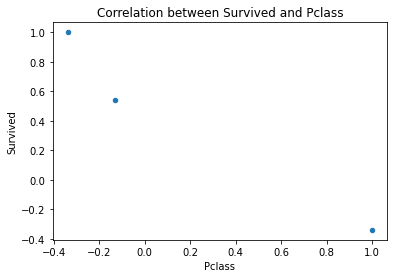

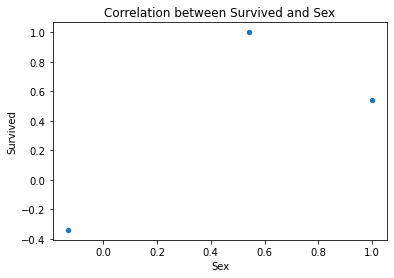

In [286]:
#Q9 AND Q10
import pandas as pd
data = pd.read_csv('Titanic/train.csv')
data = data.replace({'Sex': 'male'}, {'Sex': 0})
data = data.replace({'Sex': 'female'}, {'Sex': 1})
for x in ['PassengerId', 'Name', 'Age', 'SibSp', 'Ticket', 'Cabin', 'Embarked', 'Parch', 'Fare']:
    data = data.drop(x, 1) 
q9 = data.corr()
q9.plot.scatter(x='Pclass',y='Survived', title='Correlation between Survived and Pclass')
q9.plot.scatter(x='Sex',y='Survived', title='Correlation between Survived and Sex')


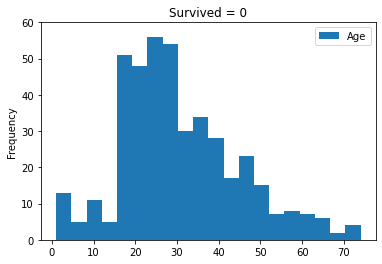

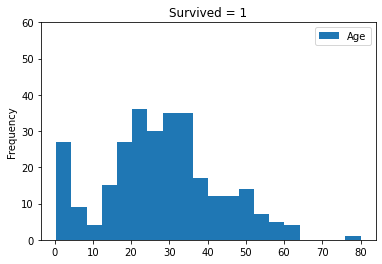

In [340]:
#Q11
import pandas as pd
import pylab as pl
data = pd.read_csv('Titanic/train.csv')
for x in ['PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']:
     data = data.drop(x, 1) 
for survived,group in data.groupby('Survived'):
    group.drop('Survived', 1).plot(kind='hist',title='Survived = ' + str(survived), bins=20, ylim=(0,60))

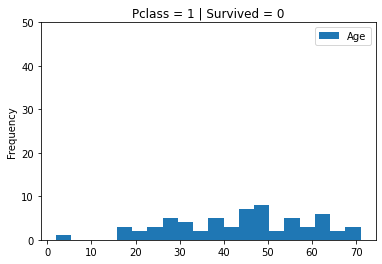

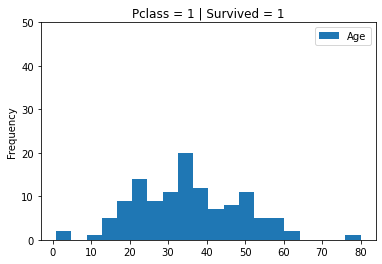

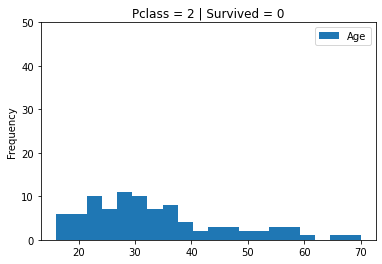

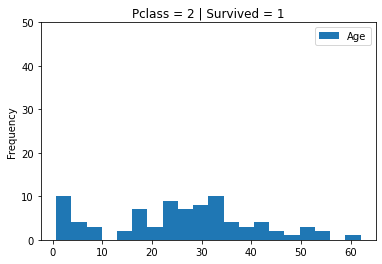

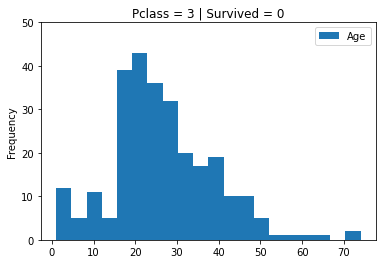

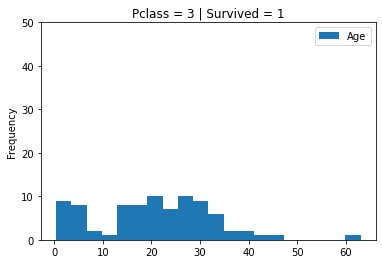

In [338]:
#Q12
import pandas as pd
data = pd.read_csv('Titanic/train.csv')
for x in ['PassengerId', 'Name', 'Sex', 'SibSp', 'Ticket', 'Cabin', 'Embarked', 'Parch', 'Fare']:
    data = data.drop(x, 1) 
for pClass, group in data.groupby('Pclass'):
    for survived, group2 in group.groupby('Survived'):
        group2.drop('Pclass',1).drop('Survived',1).plot(kind='hist',title='Pclass = ' + str(pClass) + ' | ' + 'Survived = ' + str(survived), bins=20, ylim=(0,50))

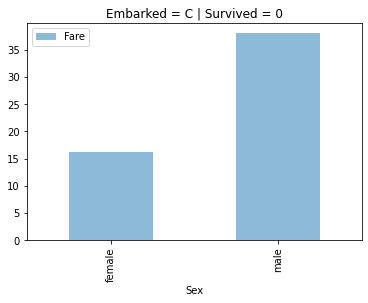

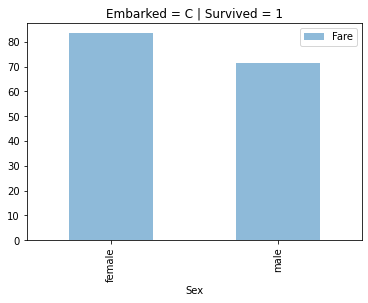

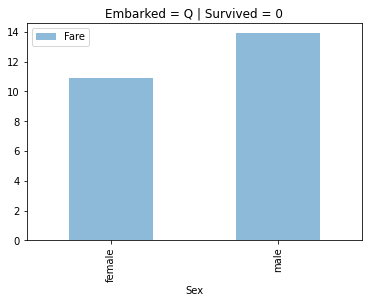

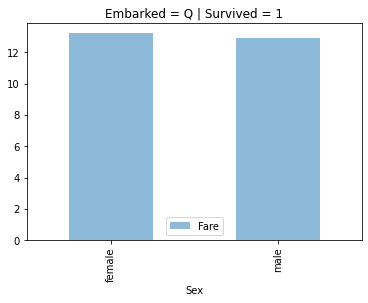

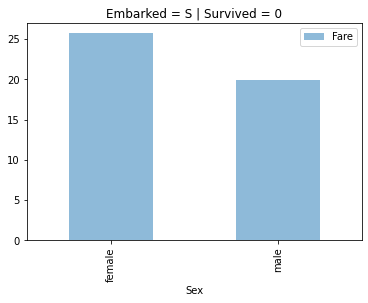

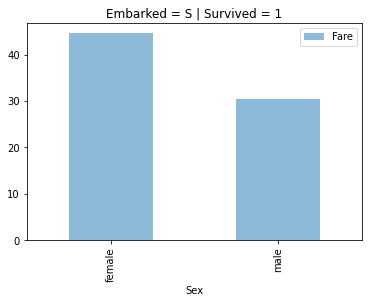

In [1]:
#Q13
import pandas as pd
data = pd.read_csv('Titanic/train.csv')
for x in ['PassengerId', 'Name', 'Pclass', 'Age', 'SibSp', 'Ticket', 'Cabin', 'Parch']:
    data = data.drop(x, 1) 
for g, group in data.groupby(['Embarked', 'Survived']):
    group = group.drop('Embarked',1).drop('Survived',1)
    result = group.groupby('Sex').mean()
    result.plot(kind='bar', title='Embarked = ' + str(g[0]) + ' | ' + 'Survived = ' + str(g[1]), alpha= 0.5)